<a href="https://colab.research.google.com/github/amirmohammadkalateh/ANN/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [22]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)


In [23]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [24]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:

epochs = 15
batch_size = 64
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 159ms/step - accuracy: 0.2905 - loss: 1.9037 - val_accuracy: 0.5406 - val_loss: 1.2721
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 158ms/step - accuracy: 0.5137 - loss: 1.3568 - val_accuracy: 0.6158 - val_loss: 1.0702
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 156ms/step - accuracy: 0.5906 - loss: 1.1569 - val_accuracy: 0.6430 - val_loss: 1.0062
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 159ms/step - accuracy: 0.6401 - loss: 1.0217 - val_accuracy: 0.6953 - val_loss: 0.8878
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 161ms/step - accuracy: 0.6721 - loss: 0.9393 - val_accuracy: 0.7100 - val_loss: 0.8334
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 161ms/step - accuracy: 0.7024 - loss: 0.8550 - val_accuracy: 0.7219 - val_loss: 0.8025
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 162ms/step - accuracy: 0.7217 - loss: 0.8039 - val_accuracy: 0.7304 - val_loss: 0.7692
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 155ms/step - accuracy: 0.7430 -

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Loss:", test_loss)
print("(Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7453 - loss: 0.8207
Loss: 0.829473614692688
(Accuracy: 0.7445999979972839


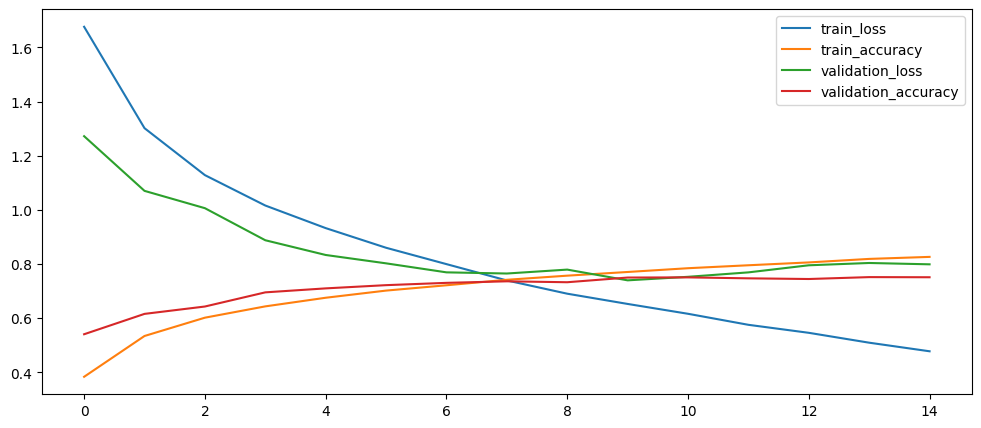

In [35]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize = (12,5))
ax.plot(history.history["loss"] , label="train_loss")
ax.plot(history.history["accuracy"] , label = "train_accuracy")
ax.plot(history.history["val_loss"] , label= "validation_loss")
ax.plot(history.history["val_accuracy"], label = "validation_accuracy")
ax.legend()

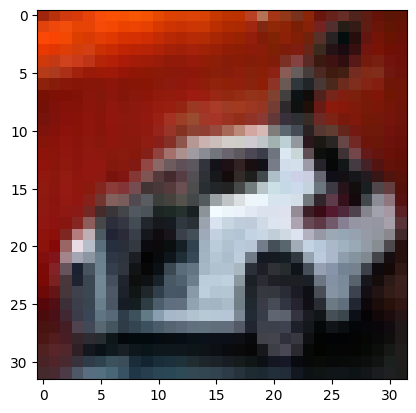

In [44]:
z = x_test[5:7:,:,:]
z.shape
plt.imshow(z[1,:,:], cmap="gray")


In [45]:
model.predict(z)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[7.5427138e-06, 8.6278533e-06, 1.8958955e-03, 7.6726601e-02,
        4.3332716e-03, 6.0703579e-02, 8.5623980e-01, 7.5968419e-06,
        4.6176551e-06, 7.2404560e-05],
       [3.7403062e-03, 4.8819724e-01, 2.5694566e-05, 9.2420105e-06,
        7.0761274e-08, 7.4915459e-07, 8.1142707e-07, 1.5150363e-08,
        3.7883819e-05, 5.0798792e-01]], dtype=float32)

In [46]:
import numpy as np
np.argmax(model.predict(z))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


6